In [2]:
import pandas as pd
import numpy as np
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import datasets
from sklearn import svm, preprocessing, cross_validation
from sklearn.linear_model import LinearRegression
import quandl, math
quandl.ApiConfig.api_key = "_1LjZZVx4HVVTwzCmqxg"


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
df = quandl.get('WIKI/GOOGL')

df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

df['HL_PCT']=(df['Adj. High']-df['Adj. Low'])/df['Adj. Close'] *100.0

df['PCT_change']= (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open'] *100.0

df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]
df

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0
2004-08-20,54.322689,7.921706,7.227007,22834300.0
2004-08-23,54.869377,4.049360,-1.227880,18256100.0
2004-08-24,52.597363,7.657099,-5.726357,15247300.0
2004-08-25,53.164113,3.886792,1.183658,9188600.0
2004-08-26,54.122070,3.048837,2.820391,7094800.0
2004-08-27,53.239345,2.760245,-1.803885,6211700.0
2004-08-30,51.162935,3.411430,-3.106003,5196700.0
2004-08-31,51.343492,1.514115,0.048866,4917800.0


In [15]:
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int (math.ceil(0.01 * len(df)))
df['label']=df[forecast_col].shift(-forecast_out)

#define X feature is entire dataframe except label column and convert it to a numpy array
X=np.array(df.drop(['label'],1))
#y is our label just label column of the dataframe df. convert to a numpy array
y=np.array(df['label'])


In [16]:
df

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0,69.078238
2004-08-20,54.322689,7.921706,7.227007,22834300.0,67.839414
2004-08-23,54.869377,4.049360,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,7.657099,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,3.886792,1.183658,9188600.0,71.219849
2004-08-26,54.122070,3.048837,2.820391,7094800.0,72.278116
2004-08-27,53.239345,2.760245,-1.803885,6211700.0,74.810934
2004-08-30,51.162935,3.411430,-3.106003,5196700.0,74.199045
2004-08-31,51.343492,1.514115,0.048866,4917800.0,70.462511


In [5]:
#preprocessing X to range -1 to 1
X= preprocessing.scale(X)
X_lately = X[-forecast_out:]
X= X[:-forecast_out]

df.dropna(inplace= True)

#create label y
y=np.array(df['label'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size=0.2)
#clf = svm.SVR()




clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence=clf.score(X_test, y_test)
print(confidence)

0.978888930121


In [20]:
print (X.shape)

num_samples = X.shape[0]
X_train = X[0:int(0.8*num_samples)]
y_train = y[0:int(0.8*num_samples)]
X_test = X[int(0.8*num_samples):num_samples]
y_test = y[int(0.8*num_samples):num_samples]
print(X_train.shape)

(3412, 4)
(2729, 4)


In [12]:
print(df)

                     Adj. Close    HL_PCT  PCT_change  Adj. Volume      label  \
Date                                                                            
2004-08-19 00:00:00   50.322842  8.072956    0.324968   44659000.0  69.078238   
2004-08-20 00:00:00   54.322689  7.921706    7.227007   22834300.0  67.839414   
2004-08-23 00:00:00   54.869377  4.049360   -1.227880   18256100.0  68.912727   
2004-08-24 00:00:00   52.597363  7.657099   -5.726357   15247300.0  70.668146   
2004-08-25 00:00:00   53.164113  3.886792    1.183658    9188600.0  71.219849   
2004-08-26 00:00:00   54.122070  3.048837    2.820391    7094800.0  72.278116   
2004-08-27 00:00:00   53.239345  2.760245   -1.803885    6211700.0  74.810934   
2004-08-30 00:00:00   51.162935  3.411430   -3.106003    5196700.0  74.199045   
2004-08-31 00:00:00   51.343492  1.514115    0.048866    4917800.0  70.462511   
2004-09-01 00:00:00   50.280210  3.291771   -2.385589    9138200.0  74.921275   
2004-09-02 00:00:00   50.912

In [7]:
forecast_set = clf.predict(X_lately)
#print(forecast_set, confidence, forecast_out)
#add Forecase column to dataframe
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]


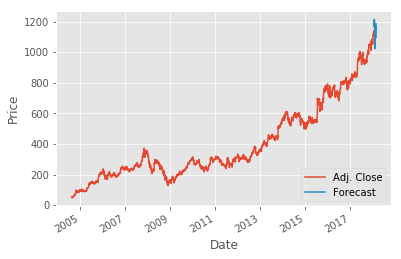

In [8]:
#print(df['Adj. Close'].tail(40))

style.use('ggplot')

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.rcParams['figure.figsize'] = (200,200)
plt.show()


In [9]:
from statistics import mean

In [10]:
def best_fit_slope_and_intercepts(xs,ys):
    m=(mean(xs)*mean(ys)-mean(xs*ys))/(mean(xs)**2-mean(xs**2))
    b=mean(ys)-m*mean(xs)
    return m , b

m, b= best_fit_slope_and_intercepts(xs,ys)

regression_line = [(m*x)+b for x in xs]

predict_x=0
predict_y=predict_x*m+b


def squared_error(ys_orig,ys_line):
    return sum((ys_line-ys_orig)*(ys_line-ys_orig))

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line=[mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig,ys_line)
    squared_error_y_mean = squared_error(ys_orig,y_mean_line)
    return 1-(squared_error_regr/squared_error_y_mean)


    

NameError: name 'xs' is not defined